In [1]:
import pandas as pd
%matplotlib inline

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This gets pretty much all recent data logger temperature data from RCL

In [2]:
url = 'http://fits.geonet.org.nz/observation?networkID=VO&siteID=RU001&typeID=t&days=6000&methodID=logic'
df = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
df.head()

,t (C)
date-time,
2009-04-15 02:00:00,30.07
2009-04-15 03:00:00,29.25
2009-04-15 04:00:00,28.51
2009-04-15 05:00:00,27.22
2009-04-15 06:00:00,27.15


Data unevenly sampled, resample as daily mean

In [3]:
dfday = df.resample('D').mean()
dfday.head()

,t (C)
date-time,
2009-04-15,27.664545
2009-04-16,27.598750
2009-04-17,27.520417
2009-04-18,27.800833
2009-04-19,27.623750


daily mean has some NaN values, days with no temperature measurements, drop rows with these

In [4]:
dfday.dropna(inplace=True)
len(dfday[' t (C)'])

2961

In [5]:
dfday[' t (C)'].describe()

count    2961.000000
mean       25.430252
std         6.692454
min        12.595000
25%        20.598421
50%        23.711667
75%        30.536863
max        45.637083
Name:  t (C), dtype: float64

time-series plot, raw data, daily mean values, superimpose median (red), 0.25, 0.75 (green), 0.05, 0.95 (black)

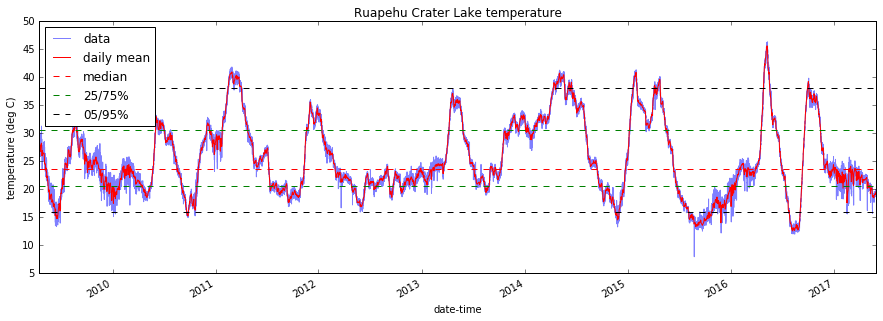

In [6]:
temp = df[' t (C)'].plot(figsize=(15,5), title='Ruapehu Crater Lake temperature', alpha = 0.5, label='data')
temp.set_ylabel("temperature (deg C)")
dfday[' t (C)'].plot(ax=temp, color='red', label='daily mean')

temp.axhline(dfday[' t (C)'].median(), color='red', linestyle='dashed', linewidth=1, label='median')

temp.axhline(dfday[' t (C)'].quantile(q=0.25), color='green', linestyle='dashed', linewidth=1, label='25/75%')
temp.axhline(dfday[' t (C)'].quantile(q=0.75), color='green', linestyle='dashed', linewidth=1)

temp.axhline(dfday[' t (C)'].quantile(q=0.05), color='black', linestyle='dashed', linewidth=1, label='05/95%')
temp.axhline(dfday[' t (C)'].quantile(q=0.95), color='black', linestyle='dashed', linewidth=1)

tp = temp.legend(loc='best')

In [7]:
fig = tp.get_figure()
fig.savefig('rcltemp_plot.png', dpi=200)

histogram, one bin per degree

In [8]:
trange = dfday[' t (C)'].max() - dfday[' t (C)'].min()
print int(trange)

33


In [20]:
mean = dfday[' t (C)'].mean()
'{:.1f}'.format(mean)

'25.4'

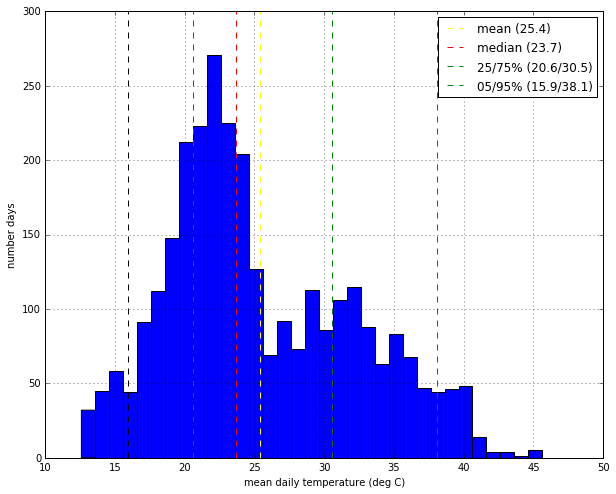

In [26]:
hist = dfday[' t (C)'].hist(bins=int(trange), figsize=(10,8))
hist.set_ylabel("number days")
hist.set_xlabel("mean daily temperature (deg C)")

mean = dfday[' t (C)'].mean()
meanstr = '{:.1f}'.format(mean)
hist.axvline(mean, color='yellow', linestyle='dashed', linewidth=1, label='mean ('+meanstr+')')

median = dfday[' t (C)'].median()
medianstr = '{:.1f}'.format(median)
hist.axvline(median, color='red', linestyle='dashed', linewidth=1, label='median ('+medianstr+')')

q25 = dfday[' t (C)'].quantile(q=0.25)
q25str = '{:.1f}'.format(q25)
hist.axvline(q25, color='green', linestyle='dashed', linewidth=1)
q75 = dfday[' t (C)'].quantile(q=0.75)
q75str = '{:.1f}'.format(q75)
hist.axvline(q75, color='green', linestyle='dashed', linewidth=1, label='25/75% ('+q25str+'/'+q75str+')')

q05 = dfday[' t (C)'].quantile(q=0.05)
q05str = '{:.1f}'.format(q05)
hist.axvline(q05, color='black', linestyle='dashed', linewidth=1)
q95 = dfday[' t (C)'].quantile(q=0.95)
q95str = '{:.1f}'.format(q95)
hist.axvline(q95, color='green', linestyle='dashed', linewidth=1, label='05/95% ('+q05str+'/'+q95str+')')

hp = hist.legend(loc='best')

In [27]:
fig = hp.get_figure()
fig.savefig('rcltemp_hist.png', dpi=200)